参考文献（実装）：
https://qiita.com/everylittle/items/c088564d53cdfcde92cc

In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import SGD

from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(111)
np.random.seed(111)

In [2]:
def plant_siso(u):
    A = np.matrix([[0.5, 0.25, 0.125], [1, 0, 0], [0, 1, 0]])
    b = np.matrix([[1], [0], [0]])
    c = np.matrix([1, 1, 1])
    
    step = len(u)
    x = np.zeros((3,1))
    y = np.zeros((step,1))
    for i in range(step):
        x = A*x + b*u[i]
        y[i] = c*x

    return y

In [3]:
n = 51200
u = np.random.uniform(0, 1, (n, 30, 1))
y = np.zeros((n, 30, 1))

# y = np.array([plant_siso(u[i,:]) for i in range(n)])
for i in tqdm(range(n)):
    y[i,:,:] = plant_siso(u[i,:])

100%|██████████████████████████████████████████████████████████| 51200/51200 [00:53<00:00, 959.04it/s]


In [4]:
model = Sequential([
    SimpleRNN(1, activation=None, input_shape=(None, 1), return_sequences=True) 
])
model.compile(optimizer=SGD(lr=0.0001), loss="mean_squared_error")
model.fit(u, y, batch_size=512, epochs=100)

2021-11-17 00:05:58.719644: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ryotaroshima/.pyenv/versions/miniconda3-4.7.12/envs/model_tutorial/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 72.2197
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 71.1777
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 70.2629
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 69.3718
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 68.4931
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 67.6214
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 66.7520
Epoch 8/100
100/100 [==============================] - 1s 6ms/step - loss: 65.8795
Epoch 9/100
100/100 [==============================] - 1s 6ms/step - loss: 64.9971
Epoch 10/100
100/100 [==============================] - 1s 5ms/step - loss: 64.0968
Epoch 11/100
100/100 [==============================] - 1s 7ms/step - loss: 63.1688
Epoch 12/100
100/100 [==============================] - 1s 5ms/step - loss: 62.2006
E

In [5]:
u_test = np.ones((1, 30, 1)) * 0.5
y_test = plant_siso(u_test[0,:])
y_pred = model.predict(u_test).flatten()

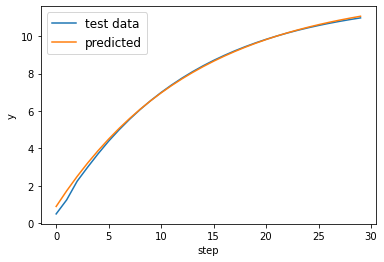

In [6]:
u_test1 = np.ones((1, 30, 1)) * 0.5
y_test1 = plant_siso(u_test1[0,:])
y_pred1 = model.predict(u_test1).flatten()

tt = range(30)
fig, ax = plt.subplots()
ax.plot(tt, y_test1, label="test data")
ax.plot(tt, y_pred1, label="predicted")
ax.legend(fontsize=12)
ax.set_xlabel('step')
ax.set_ylabel('y')
plt.show()

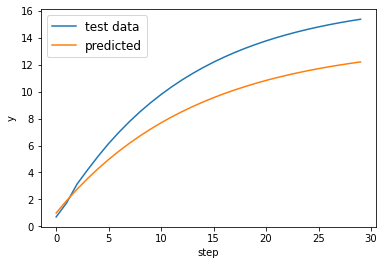

In [7]:
u_test2 = np.ones((1, 30, 1)) *0.7
y_test2 = plant_siso(u_test2[0,:])
y_pred2 = model.predict(u_test2).flatten()

fig, ax = plt.subplots()
ax.plot(tt, y_test2, label="test data")
ax.plot(tt, y_pred2, label="predicted")
ax.legend(fontsize=12)
ax.set_xlabel('step')
ax.set_ylabel('y')
plt.show()